In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./Sample - Superstore.csv', encoding='latin1')  # Файл с Kaggle
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = df['Sales'].astype(float)
df['Month'] = df['Order Date'].dt.to_period('M')  # Добавляем месяц для анализа

In [17]:
df['Month']

0       2016-11
1       2016-11
2       2016-06
3       2015-10
4       2015-10
         ...   
9989    2014-01
9990    2017-02
9991    2017-02
9992    2017-02
9993    2017-05
Name: Month, Length: 9994, dtype: period[M]

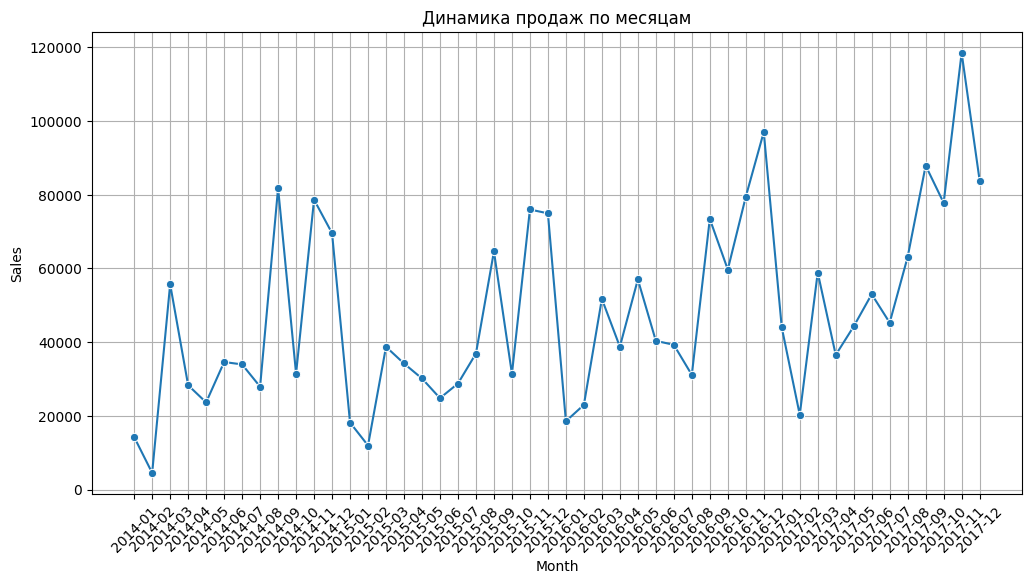

In [16]:
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Динамика продаж по месяцам')
plt.xticks(rotation=45)
plt.grid()
plt.show()

ТОП-5 товаров:
 Product Name
Staples                       215
Staple envelope               170
Easy-staple paper             150
Staples in misc. colors        86
KI Adjustable-Height Table     74
Name: Quantity, dtype: int64

ТОП-5 категорий:
 Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_28364\3385198486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


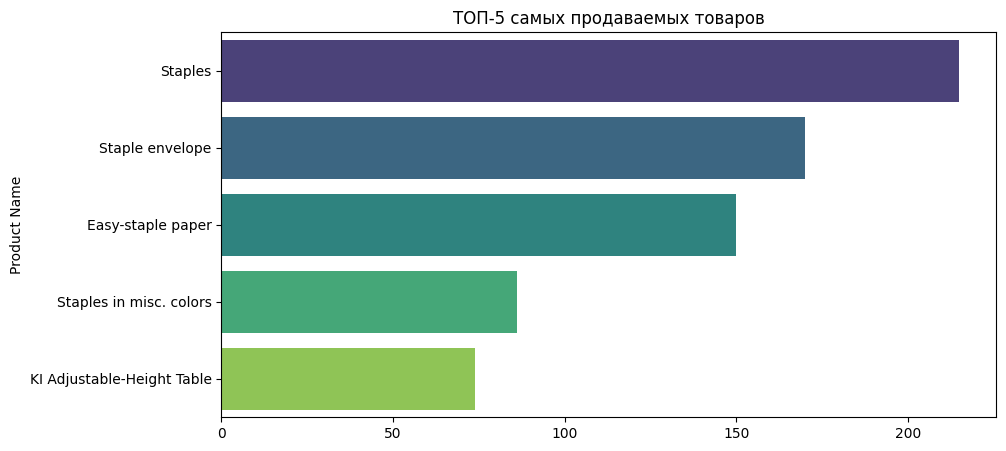

In [18]:
top_products = df.groupby('Product Name')['Quantity'].sum().nlargest(5)
top_categories = df.groupby('Category')['Quantity'].sum().nlargest(5)

print("ТОП-5 товаров:\n", top_products)
print("\nТОП-5 категорий:\n", top_categories)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('ТОП-5 самых продаваемых товаров')
plt.show()

In [20]:
df.groupby('Product Name')['Quantity'].sum().nlargest(5)

Product Name
Staples                       215
Staple envelope               170
Easy-staple paper             150
Staples in misc. colors        86
KI Adjustable-Height Table     74
Name: Quantity, dtype: int64

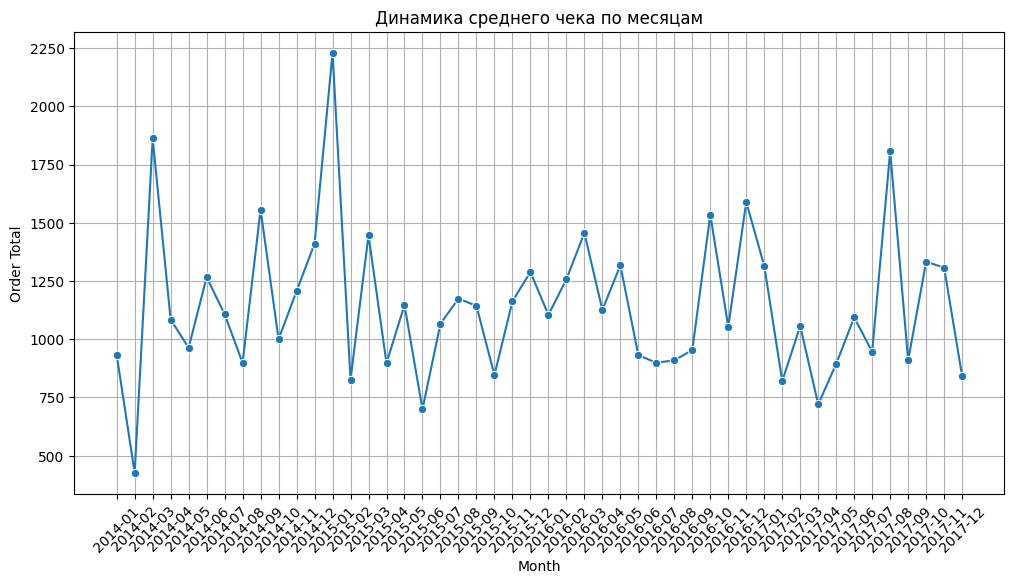

In [37]:
df['Order Total'] = df['Sales'] * df['Quantity']
# Сначала убедимся, что данные подготовлены правильно
avg_check = df.groupby('Month')['Order Total'].mean().reset_index()

# Преобразуем Period в строку (или в datetime для правильного порядка)
avg_check['Month'] = avg_check['Month'].astype(str)  # Вариант 1: в строку
# # ИЛИ 
# avg_check['Month'] = avg_check['Month'].dt.to_timestamp()  # Вариант 2: в datetime

# Теперь построим график
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_check, 
    x='Month', 
    y='Order Total', 
    marker='o',
    sort=False  # Важно, если x - строки!
)
plt.title('Динамика среднего чека по месяцам')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [38]:
# Для Power BI/Tableau сохраним обработанные данные
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')  # Формат для оси времени
df['Order Total'] = df['Sales'] * df['Quantity']

# Сохраняем в CSV
df.to_csv('SuperStore_Processed.csv', index=False)

In [34]:
avg_check["Month"][2]

Period('2014-03', 'M')